# Ames Housing Dataset price modeling

We investigate the data to remove unnecessary columns and max-scale label

This could either happen in the private data lake or on the modeler's machine. In this case, we mimic a modeler requesting certain fields and a certain series of preprocessing steps.

In [1]:
import numpy as np
import pandas as pd   
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("data.csv")

In [3]:
print(f"Original size of dataframe {df.shape}") 

Original size of dataframe (1460, 81)


# Initial Investigation

We first subset the data according to some pre-determined requirements like only numerical data, and data that is immediately relevant to the problem. Take a look at the data_description.txt file to get a better understanding of this.


In [4]:
residential_areas = {"RH", "RL", "RP", "RM"}
acceptable_housing_conditions = {10, 9, 8, 7, 6}


df = df[df["MSZoning"].isin(residential_areas)] 
print(f"First subset iteration taking only residential areas. Size of dataframe {df.shape}\n")

df = df[df["OverallCond"].isin(acceptable_housing_conditions)]  
print(f"Second subset iteration taking only homes above some quality. Size of dataframe {df.shape}")

First subset iteration taking only residential areas. Size of dataframe (1385, 81)

Second subset iteration taking only homes above some quality. Size of dataframe (546, 81)


In [5]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
15,16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
columns_to_keep = ["LotArea", 'YearBuilt', 'TotalBsmtSF', 
                   '1stFlrSF', '2ndFlrSF', 'MiscVal', 
                  "GarageCars", "Fireplaces", "BedroomAbvGr", 
                   "SalePrice"  # Our label
                  ]
df = df[columns_to_keep]
df = df.reset_index()
df.head()

,index,LotArea,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,MiscVal,GarageCars,Fireplaces,BedroomAbvGr,SalePrice
0,1,9600,1976,1262,1262,0,0,2,1,3,181500
1,7,10382,1973,1107,1107,983,350,2,2,3,200000
2,9,7420,1939,991,1077,0,0,1,2,2,118000
3,12,12968,1962,912,912,0,0,1,0,2,144000
4,15,6120,1929,832,854,0,0,2,0,2,132000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   index         546 non-null    int64
 1   LotArea       546 non-null    int64
 2   YearBuilt     546 non-null    int64
 3   TotalBsmtSF   546 non-null    int64
 4   1stFlrSF      546 non-null    int64
 5   2ndFlrSF      546 non-null    int64
 6   MiscVal       546 non-null    int64
 7   GarageCars    546 non-null    int64
 8   Fireplaces    546 non-null    int64
 9   BedroomAbvGr  546 non-null    int64
 10  SalePrice     546 non-null    int64
dtypes: int64(11)
memory usage: 47.0 KB


We note that there are 546 entries in the dataset and that all of the entries are non-null which is appropriate for our problem setup.

In [9]:
df.describe()

,index,LotArea,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,MiscVal,GarageCars,Fireplaces,BedroomAbvGr,SalePrice
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,734.025641,10402.970696,1951.327839,931.294872,1075.120879,321.586081,73.498168,1.465201,0.575092,2.869963,158239.322344
std,422.154604,10479.460523,24.877252,322.074023,329.837375,404.314980,698.436286,0.671625,0.673783,0.794208,60040.062258
min,1.000000,1300.000000,1875.000000,0.000000,483.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37900.000000
25%,381.750000,7201.750000,1931.000000,732.000000,854.250000,0.000000,0.000000,1.000000,0.000000,2.000000,124925.000000
50%,718.000000,9163.000000,1957.000000,894.000000,1014.500000,0.000000,0.000000,2.000000,0.000000,3.000000,144700.000000
75%,1097.500000,11284.000000,1970.000000,1095.000000,1215.750000,672.000000,0.000000,2.000000,1.000000,3.000000,175875.000000
max,1459.000000,164660.000000,2007.000000,2444.000000,2898.000000,1872.000000,15500.000000,4.000000,3.000000,8.000000,755000.000000


In [10]:
df.head()

,index,LotArea,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,MiscVal,GarageCars,Fireplaces,BedroomAbvGr,SalePrice
0,1,9600,1976,1262,1262,0,0,2,1,3,181500
1,7,10382,1973,1107,1107,983,350,2,2,3,200000
2,9,7420,1939,991,1077,0,0,1,2,2,118000
3,12,12968,1962,912,912,0,0,1,0,2,144000
4,15,6120,1929,832,854,0,0,2,0,2,132000


# Price Investigation  

In this section we conduct EDA to gain an understanding of the distribution of prices.

<AxesSubplot:>

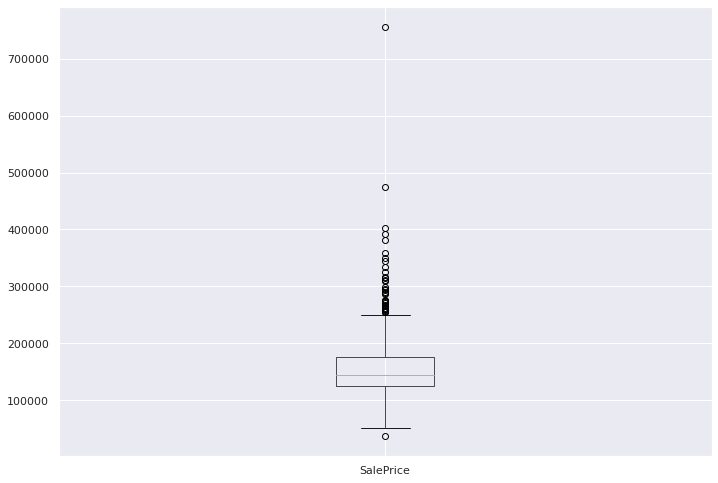

In [11]:
df.boxplot(column="SalePrice") 

## Boxplot discussion 

From the boxplot we see that there exist many outliers in the data that would lead to issues in our linear regression.

## Next Steps

We investigate this further by sorting the points by value then plotting  

We follow this by removing values above and below the "minimum" and "maximum" line and visualizing both the boxplot and the sorting and plotting. Again, in this scenario we imagine a data modeler that has submitted a series of steps to the private data lake.

In [12]:
sorted_prices = df.SalePrice.sort_values()

sorted_prices = sorted_prices.reset_index()

sorted_prices.drop(columns="index", inplace=True)

sorted_prices

,SalePrice
0,37900
1,52000
2,64500
3,66500
4,68500
...,...
541,381000
542,392000
543,402000
544,475000


<AxesSubplot:>

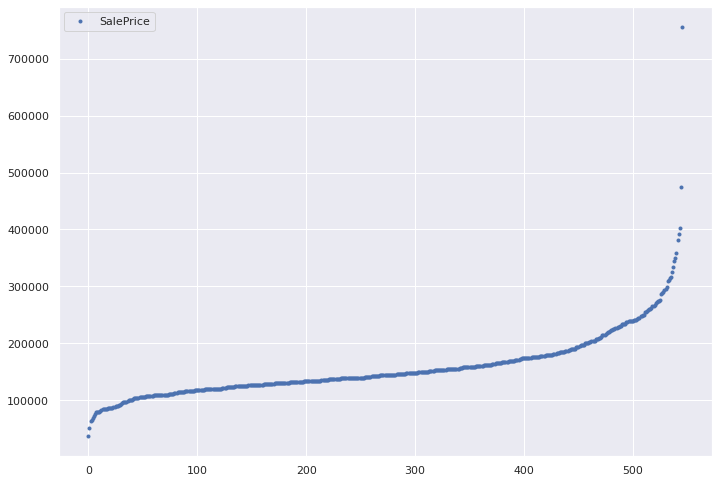

In [13]:
sorted_prices.plot(style='.')

## Scatter Plot Discussion

From the plot it is apparent that the data is non-linear. We proceed to remove the outliers according to the boxplot from earlier

In [14]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['SalePrice'] >= Q1 - 1.5 * IQR) & (df['SalePrice'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]

# Post-outlier removal analysis

<AxesSubplot:>

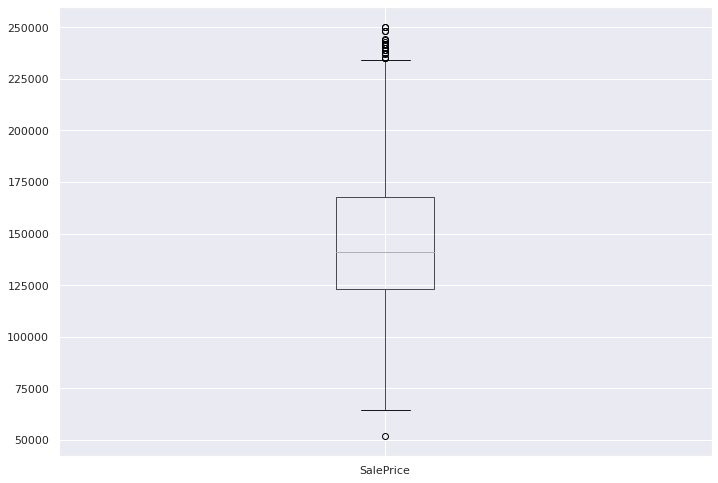

In [15]:
df.boxplot(column="SalePrice")


## Boxplot Discussion 2

We see that the outliers (based on the boxplot calculations) have been removed from the dataset and the range of values is acceptable. To "verify" this, we do a scatter plot of the data.

In [16]:
sorted_prices = df.SalePrice.sort_values()

sorted_prices = sorted_prices.reset_index()

sorted_prices.drop(columns="index", inplace=True)

sorted_prices

,SalePrice
0,52000
1,64500
2,66500
3,68500
4,72500
...,...
505,244400
506,248000
507,248328
508,250000


<AxesSubplot:>

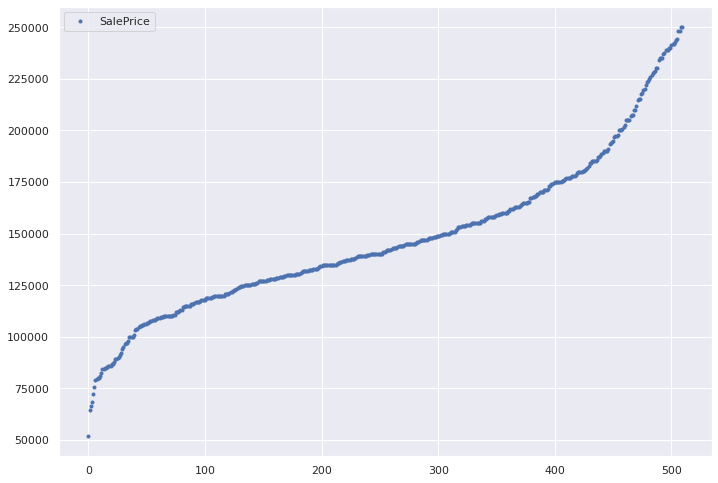

In [17]:
sorted_prices.plot(style='.')

In [18]:
label = df.SalePrice

df.drop(columns=["SalePrice", "index"], inplace=True)

## Scatter Plot Discussion 2

Although the data is still non-linear, this is acceptable and we can begin modeling. 

In [23]:
df.to_csv("processed_X.csv", index=False, sep=",")

In [24]:
label.to_csv("processed_y.csv", index=False, sep=",")

# Closing Words

Although the resulting graph is better, there are still methods that exist which could help transform the values to exhibit more linearity. Nevertheless, those methods are outside the scope of this project which is to showcase the efficacy of encrypted linear regressions